# **Lets Grow More**
*   Author: Anshu Sharma
*   TASK(2): Stock Prediction

In [ ]:
# importing dataset and neccesary libraries
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(url)
data = pd.DataFrame(df)
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
data.info()
data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
rev_data = data.iloc[::-1]
rev_data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [ ]:
# checking for null values.
rev_data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

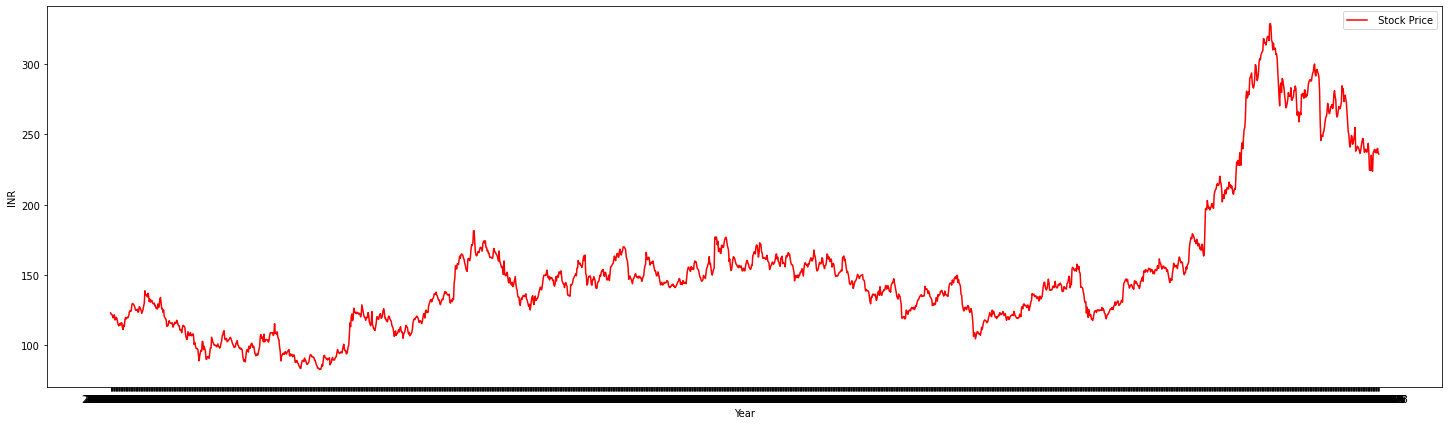

In [ ]:
# visualising the stocks progress
fig = plt.figure(figsize = (25, 7))
plt.plot(rev_data.Date,rev_data.High, color = 'red', label = ' Stock Price')
plt.xlabel('Year')
plt.ylabel('INR')
plt.legend()
plt.show()

In [ ]:
# splitting dataset for training and testing of model
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(rev_data,train_size = 0.8, shuffle =False)

In [ ]:
print(data_train.shape)
print(data_test.shape)

(1628, 8)
(407, 8)


In [ ]:
# dropping unuseful columns
data_train.drop(['Date','Last'], axis =1,inplace= True)
data_test.drop(['Date','Last'], axis =1,inplace=True)

In [ ]:
print(data_train.shape)
print(data_test.shape)

(1628, 6)
(407, 6)


In [ ]:
# Preprocessing and standardising Data
from sklearn.preprocessing import MinMaxScaler

# scale our price from 0 to 1

sc = MinMaxScaler(feature_range = (0, 1))
train_set= sc.fit_transform(data_train)
test_set = sc.fit_transform(data_test)

In [ ]:
print(train_set)


[[0.41456016 0.40729483 0.44092374 0.41470889 0.03462666 0.02723961]
 [0.39635996 0.39716312 0.43233083 0.40806946 0.01419073 0.0113053 ]
 [0.41152679 0.39665653 0.43233083 0.40551583 0.01351951 0.01077722]
 ...
 [0.57735086 0.61904762 0.61331901 0.62206333 0.19742248 0.17766623]
 [0.61476239 0.62765957 0.65735768 0.63125638 0.11678567 0.10668446]
 [0.61678463 0.63829787 0.64554243 0.62002043 0.12117162 0.11087637]]


In [ ]:
print(test_set)

[[0.01823467 0.03732133 0.02487831 0.04797244 0.05688484 0.04031548]
 [0.03964059 0.03864479 0.03407247 0.03604559 0.04166872 0.02895183]
 [0.0288055  0.02991001 0.03163872 0.03631063 0.0291277  0.01931034]
 ...
 [0.53646934 0.5301747  0.51784749 0.51497482 0.05960733 0.07909168]
 [0.50766385 0.51323452 0.51027582 0.509674   0.15877388 0.19963952]
 [0.50502114 0.50873478 0.50540833 0.51232441 0.0885345  0.11398598]]


In [ ]:
# this function will combine data of 60 days (we can change it using time_window parameter) 

def generate_data(series, y_col_index, time_window=60):
  X = []
  y = []
  for i in range(60, len(series)):
    X.append(series[i-time_window: i])
    y.append(series[i, y_col_index])
  return (np.array(X), np.array(y))

In [ ]:
# Splitting features and labels
X_train, y_train = generate_data(train_set, y_col_index=3)
X_test, y_test = generate_data(test_set, y_col_index=3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1568, 60, 6)
(1568,)
(347, 60, 6)
(347,)


In [ ]:
print('Training data shape: ',X_train.shape)
print('We will observe {} days price to predict next day price'.format(X_train.shape[1]))

Training data shape:  (1568, 60, 6)
We will observe 60 days price to predict next day price


# Model Building

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
model = Sequential()

# layer 1
#return_sequence=True, it will return something with shape
#unit means the dimension of the inner cells in LSTM.

model.add(LSTM(units = 50, return_sequences = True, input_shape = X_train.shape[1:]))
model.add(Dropout(0.2))

# layer 2
model.add(LSTM(units = 30, return_sequences = True))
model.add(Dropout(0.2))

# layer 3
model.add(LSTM(units = 10, return_sequences = True))
model.add(Dropout(0.2))

# layer 4
model.add(LSTM(units = 5))
model.add(Dropout(0.2))

# layer 5
model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            11400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 30)            9720      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 30)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 10)            1640      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 10)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 5)                 3

In [ ]:
# Model Learning
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train,
          y_train,
          epochs = 50,
          batch_size = 64,
          validation_data = (X_test, y_test))

Epoch 1/50
25/25 [==============================] - 10s 154ms/step - loss: 0.1325 - val_loss: 0.0339
Epoch 2/50
25/25 [==============================] - 2s 98ms/step - loss: 0.0400 - val_loss: 0.0122
Epoch 3/50
25/25 [==============================] - 3s 101ms/step - loss: 0.0289 - val_loss: 0.0071
Epoch 4/50
25/25 [==============================] - 2s 97ms/step - loss: 0.0223 - val_loss: 0.0086
Epoch 5/50
25/25 [==============================] - 3s 100ms/step - loss: 0.0255 - val_loss: 0.0064
Epoch 6/50
25/25 [==============================] - 2s 98ms/step - loss: 0.0230 - val_loss: 0.0085
Epoch 7/50
25/25 [==============================] - 2s 100ms/step - loss: 0.0212 - val_loss: 0.0080
Epoch 8/50
25/25 [==============================] - 3s 108ms/step - loss: 0.0205 - val_loss: 0.0058
Epoch 9/50
25/25 [==============================] - 2s 98ms/step - loss: 0.0196 - val_loss: 0.0095
Epoch 10/50
25/25 [==============================] - 2s 100ms/step - loss: 0.0196 - val_loss: 0.0059
Ep

In [ ]:
test_prediction = model.predict(X_test)
test_prediction = (test_prediction * sc.data_range_[3]) + sc.data_min_[3]
split_index = 1628

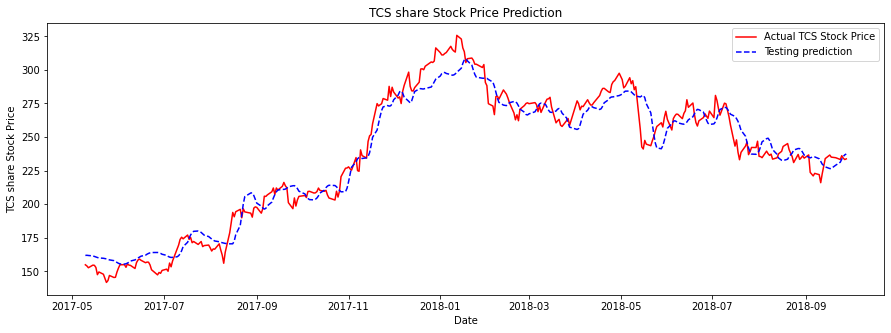

In [ ]:
rev_data['Date'] = pd.to_datetime(rev_data['Date'])
fig = plt.figure(figsize = (15, 5))
plt.plot(rev_data['Date'].values[ split_index+60 : ], rev_data.Close.values[ split_index+60 : ], 'r-', label = 'Actual TCS Stock Price')
plt.plot(rev_data['Date'].values[split_index+60 : ], test_prediction, 'b--', label = 'Testing prediction')

plt.title('TCS share Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('TCS share Stock Price')
plt.legend()
plt.show()

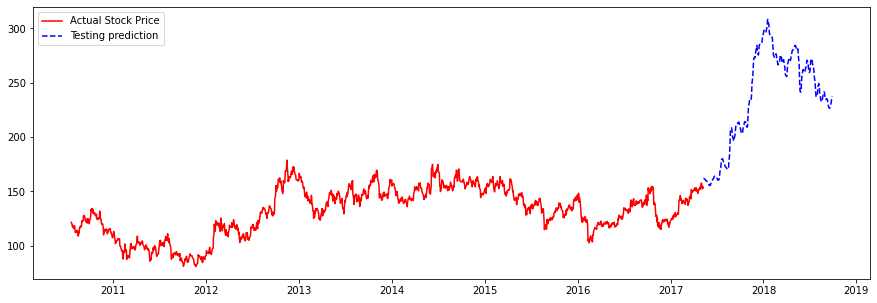

In [ ]:
# Predicting and visualising

fig = plt.figure(figsize = (15, 5))
plt.plot(rev_data.Date.values[ : split_index+60 ], rev_data.Close.values[ : split_index+60 ], 'r-', label = 'Actual Stock Price')
plt.plot(rev_data['Date'].values[split_index+60 : ], test_prediction, 'b--', label = 'Testing prediction')


plt.legend()
plt.show()

**THE END**